In [21]:
from itertools import product
import numpy as np
import pandas as pd

import chaospy

import matplotlib.pyplot as plt
plt.style.use("bmh")
%matplotlib inline

In [4]:
factors = dict(
    solar=[0.75,1.0,1.25],
    onwind=[0.75,1.0,1.25],
    offwind=[0.75,1.0,1.25],
    H2=[0.75,1.0,1.25],  
    battery=[0.75,1.0,1.25]
)

In [5]:
factors = dict(
    solar=[0.5,0.75,1.0,1.25,1.5],
    onwind=[0.5,0.75,1.0,1.25,1.5],
    offwind=[0.5,0.75,1.0,1.25,1.5],
    H2=[0.5,0.75,1.0,1.25,1.5],  
    battery=[0.5,0.75,1.0,1.25,1.5]
)

In [27]:
opts = ["3H"]

In [7]:
def add_cost_opts(wildcards_opts):
    carrier, values = zip(*factors.items())
    cost_sets = [dict(zip(carrier, v)) for v in product(*values)]

    new_opts = []
    for opts in wildcards_opts:
        for cost_set in cost_sets:
            cost_opts = "-".join([f"{c}+{v}" for c, v in cost_set.items()])
            new_opts.append(f"{opts}-{cost_opts}")
    
    return new_opts

In [ ]:
add_cost_opts(opts)

## Create `opts` from quasi-random samples

In [52]:
# TODO: unify with add_cost_opts
def add_sampled_cost_opts(wildcards_opts, order=10):
    
    dist = {}
    dist["onwind"] = chaospy.Uniform(0.5, 1.5)
    dist["offwind"] = chaospy.Uniform(0.5,1.5)
    dist["solar"] = chaospy.Uniform(0.5, 1.5)
    dist["H2"] = chaospy.Uniform(0.5, 1.5)
    dist["battery"] = chaospy.Uniform(0.5,1.5)

    distribution = chaospy.J(*dist.values())
    
    samples = distribution.sample(order, rule="halton").round(3)
    
    new_opts = []
    for opts in wildcards_opts:
        for s in samples.T:
            cost_set = dict(zip(dist.keys(), s))
            cost_opts = "-".join([f"{c}+{v}" for c, v in cost_set.items()])
            new_opts.append(f"{opts}-{cost_opts}")
    
    return new_opts

In [74]:
add_sampled_cost_opts(opts, 1000)

['3H-onwind+0.688-offwind+0.648-solar+0.98-H2+1.235-battery+0.599',
 '3H-onwind+1.188-offwind+0.981-solar+1.18-H2+1.378-battery+0.69',
 '3H-onwind+0.938-offwind+1.315-solar+1.38-H2+0.541-battery+0.781',
 '3H-onwind+1.438-offwind+0.759-solar+0.62-H2+0.684-battery+0.872',
 '3H-onwind+0.531-offwind+1.093-solar+0.82-H2+0.827-battery+0.963',
 '3H-onwind+1.031-offwind+1.426-solar+1.02-H2+0.969-battery+1.054',
 '3H-onwind+0.781-offwind+0.574-solar+1.22-H2+1.112-battery+1.145',
 '3H-onwind+1.281-offwind+0.907-solar+1.42-H2+1.255-battery+1.236',
 '3H-onwind+0.656-offwind+1.241-solar+0.66-H2+1.398-battery+1.326',
 '3H-onwind+1.156-offwind+0.685-solar+0.86-H2+0.561-battery+1.417',
 '3H-onwind+0.906-offwind+1.019-solar+1.06-H2+0.704-battery+0.517',
 '3H-onwind+1.406-offwind+1.352-solar+1.26-H2+0.847-battery+0.607',
 '3H-onwind+0.594-offwind+0.796-solar+1.46-H2+0.99-battery+0.698',
 '3H-onwind+1.094-offwind+1.13-solar+0.508-H2+1.133-battery+0.789',
 '3H-onwind+0.844-offwind+1.463-solar+0.708-H2+1.2

## Comparison of Low-Discrepancy Sampling Methods

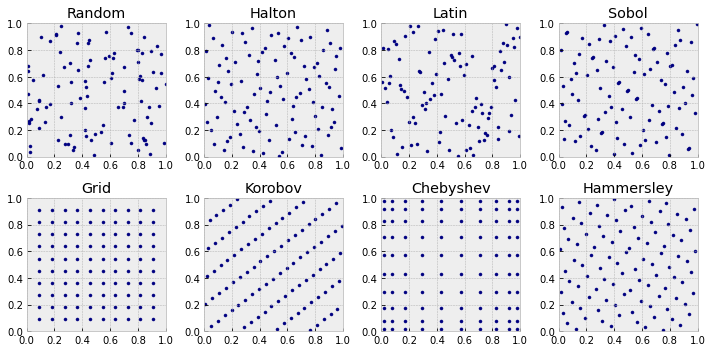

In [63]:
fig, axes = plt.subplots(2,4,figsize=(10,5))
for i, rule in enumerate(['random', 'halton', "latin", 'sobol', 'grid', 'korobov', 'chebyshev', 'hammersley']):
    ax = axes[int(i/4),i%4]
    order = 100
    dim = 2
    if rule == "latin":
        xs = lhs(order=order, dim=dim)
    else:
        if rule in ['grid', 'chebyshev']:
            order = order**(1/dim)
        xs = generate_samples(order=order, domain=dim, rule=rule)
    ax.scatter(*xs, marker='.', c='navy')
    ax.set_title(rule.capitalize())
    ax.set_ylim([0,1])
    ax.set_xlim([0,1])
    ax.set_xticks(np.arange(0,1.01,0.2))
    ax.set_yticks(np.arange(0,1.01,0.2))
plt.tight_layout()
plt.savefig("low-discrepancy-series.pdf", bbox_inches='tight')

## Multi-fidelity approach to build surrogate

In [ ]:
# TODO